Programming Assignment 1 for COMS3251 Fall 2022 <br>
Name: Xintong Qi <br>
UNI: xq2224

**Make sure you have `tests.zip` in the directory with this Python notebook before running the following lines.**
In order to upload a `.zip` file to Google Colab, click the file folder icon (the one that looks like a folder) in the far-left pane. The left pane should now be titled "Files." Click the file icon with the up arrow. This should allow you to upload files from your local machine. Choose `tests.zip`, wherever it is downloaded.

In [1]:
# Before running: make sure tests.zip is in the same directory as this notebook.
!pip install otter-grader
!unzip tests.zip

     |████████████████████████████████| 166 kB 795 kB/s eta 0:00:01
     |████████████████████████████████| 9.1 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 279 kB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 484 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 198 kB/s eta 0:00:01
     |████████████████████████████████| 151 kB 729 kB/s eta 0:00:01
     |████████████████████████████████| 84 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 1.5 MB/

In [2]:
# Initialize Otter
import otter
grader = otter.Notebook(colab=True)

# Programming Assignment 1 for COMS 3251 Fall 2022

## Preliminaries

Download the audio clips.

In [3]:
!curl -o audioclip1.wav https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/audioclip1.wav
!curl -o audioclip2.wav https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/audioclip2.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48044  100 48044    0     0   410k      0 --:--:-- --:--:-- --:--:--  411k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 48044  100 48044    0     0   272k      0 --:--:-- --:--:-- --:--:--  272k


Import some useful Python libraries

In [4]:
import numpy as np
from scipy.io import wavfile
import IPython

Load the audio clips.

In [5]:
rate1, x1 = wavfile.read('audioclip1.wav')
rate2, x2 = wavfile.read('audioclip2.wav')

In [6]:
print("x1 is a {0}-vector, representing an audio signal sampled at {1} Hz".format(len(x1), rate1))
print("x2 is a {0}-vector, representing an audio signal sampled at {1} Hz".format(len(x2), rate2))

x1 is a 24000-vector, representing an audio signal sampled at 8000 Hz
x2 is a 24000-vector, representing an audio signal sampled at 8000 Hz


Both audio clips are $n$-vectors for the same $n$, and they are sampled at the same rate.

In [7]:
n = len(x1)
r = rate1

You can play the audio directly in Jupyter notebook.

The first audio clip is a person saying, "The birch canoe slid on the smooth planks."
The second audio clip is a person saying, "Glue the sheet to the dark blue background."

(If curious, you can read more about these things [here](https://en.wikipedia.org/wiki/Harvard_sentences).)

In [8]:
IPython.display.Audio(data=x1, rate=r)

In [9]:
IPython.display.Audio(data=x2, rate=r)

You can also plot the audio signals.

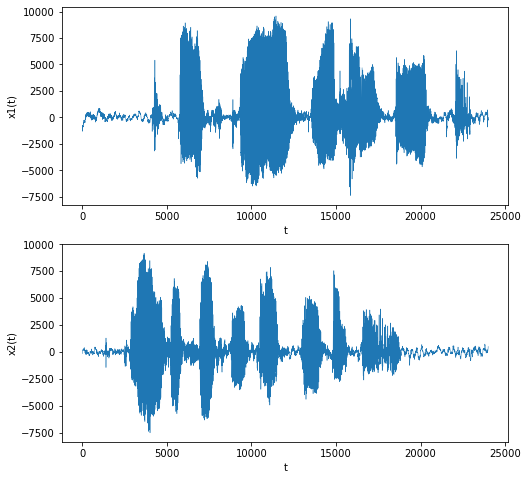

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(n), x1, linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('x1(t)')
axs[1].plot(range(n), x2, linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('x2(t)')
plt.show()

Let us listen to / look at some linear combinations of these audio signals.

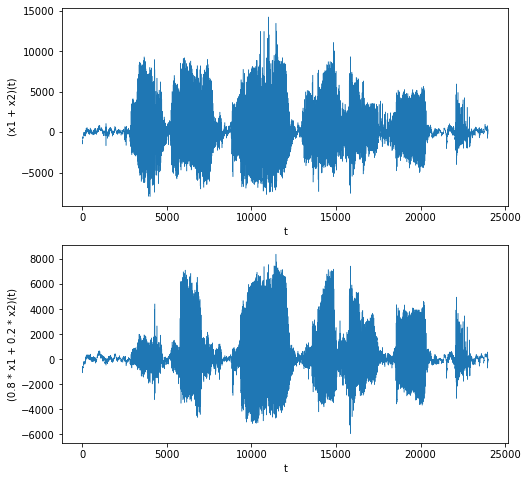

In [11]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(n), x1 + x2, linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('(x1 + x2)(t)')
axs[1].plot(range(n), 0.8 * x1 + 0.2 * x2, linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('(0.8 * x1 + 0.2 * x2)(t)')
plt.show()

In [12]:
IPython.display.Audio(data=(x1 + x2), rate=r)

In [13]:
IPython.display.Audio(data=(0.8 * x1 + 0.2 * x2), rate=r)

## Problem 1: Downsampling

Implement a function `downsample` that, given an $n$-vector $\vec x = (x_1,\dotsc,x_n)$, returns an $n/2$-vector $\vec y = (y_1,\dotsc,y_{n/2})$ such that, for all $i \in \{1,\dotsc,n\}$,
$$ y_i = x_{2i} . $$
You may assume that $n$ is even. [Downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing) audio signals saves space by compressing the signals to a fraction of their original size. You may assume that the input `x` to `downsample` is a `numpy` array.

In [14]:
def downsample(x):
  """
  Implement the `downsample` function described above. Returns the n/2-vector y.
  """
  return x[1::2]
  # choose from the second element, and every alternate element since then

In [15]:
grader.check("p1")

p1 results: All test cases passed!

In [16]:
IPython.display.Audio(data=downsample(x1), rate=r)

In [17]:
IPython.display.Audio(data=downsample(x2), rate=r)

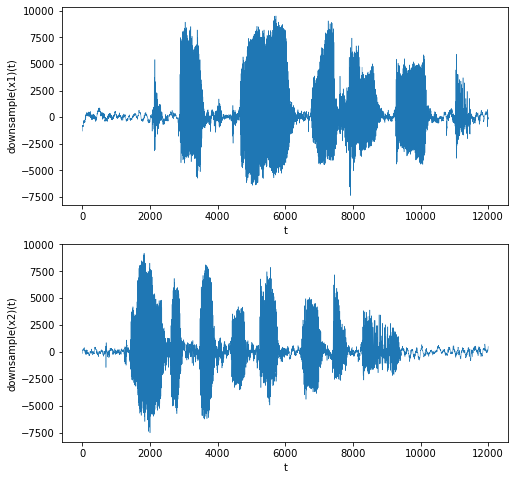

In [18]:
m = int(n/2)
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(m), downsample(x1), linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('downsample(x1)(t)')
axs[1].plot(range(m), downsample(x2), linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('downsample(x2)(t)')
plt.show()

If you listen to the audio, it should sound similar to the original but sped-up. This is because we have instructed the audio player to treat the audio signal as if it was sampled at the original sampling rate. But since we have downsampled the audio signal, we should reduce the sampling rate appropriately.

In [19]:
IPython.display.Audio(data=downsample(x1), rate=r/2)

In [20]:
IPython.display.Audio(data=downsample(x2), rate=r/2)

Downsampling is linear (check this by hand!), so `y` and `z` below should be the same.

In [21]:
y = 0.8 * downsample(x1) + 0.2 * downsample(x2)
z = downsample(0.8 * x1 + 0.2 * x2)

Let us check this by listening to the audio and by visually checking the plots.

In [22]:
IPython.display.Audio(data=y, rate=r/2)

In [23]:
IPython.display.Audio(data=z, rate=r/2)

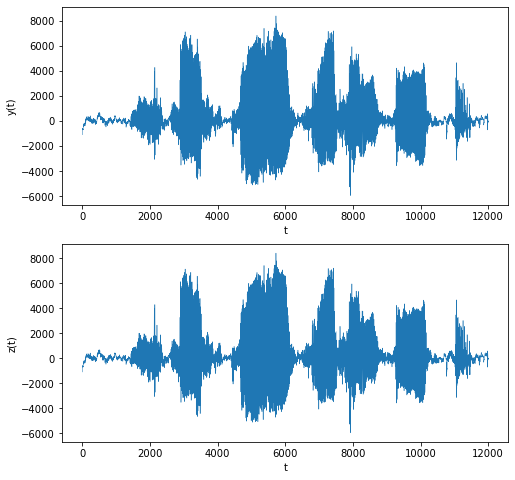

In [24]:
m = int(n/2)
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(m), y, linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('y(t)')
axs[1].plot(range(m), z, linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('z(t)')
plt.show()

## Problem 2: Lengthening a signal

Implement a function `lengthen` that, given an $n$-vector $\vec x = (x_1,\dotsc,x_n)$, returns a $(2n-1)$-vector $\vec y = (y_1,\dotsc,y_{2n-1})$ such that, for all $i \in \{1,\dotsc,2n-1\}$,
$$ y_i = 
\begin{cases}
  x_{(i+1)/2} & \text{if $i$ is odd} \\
  \frac12 (x_{i/2} + x_{i/2+1}) & \text{if $i$ is even} .
\end{cases} $$
Note that this doesn't just lengthen the signal $\vec x$, but it also "interpolates" between consecutive measurements by averaging:
$$ y_1 = x_1 , \quad y_2 = \frac12(x_1 + x_2) , \quad y_3 = x_2 , \quad y_4 = \frac12(x_2 + x_3) , \quad \ldots $$
You may assume that the input is already a `numpy` array.

In [40]:
def lengthen(x):
  """
  Implement the `lengthen` function described above. Returns the (2n-1)-vector y.
  """
  origin = list(x)
  res = []
  for i in range(len(origin)-1):
    res.append(origin[i])
    res.append((origin[i]+origin[i+1])/2)
  res.append(origin[-1])
  return np.array(res)

In [41]:
grader.check("p2")

[1.  1.5 2.  2.5 3.  3.5 4. ]


p2 results: All test cases passed!

In [42]:
IPython.display.Audio(data=lengthen(x1), rate=r) # assuming original sampling rate

In [43]:
IPython.display.Audio(data=lengthen(x2), rate=r) # assuming original sampling rate

In [44]:
IPython.display.Audio(data=lengthen(x1), rate=2*r) # doubling the sampling rate

In [45]:
IPython.display.Audio(data=lengthen(x2), rate=2*r) # doubling the sampling rate

In [46]:
y = 0.8 * lengthen(x1) + 0.2 * lengthen(x2)
z = lengthen(0.8 * x1 + 0.2 * x2)

In [47]:
IPython.display.Audio(data=y, rate=r) # assuming original sampling rate

In [48]:
IPython.display.Audio(data=z, rate=r) # assuming original sampling rate

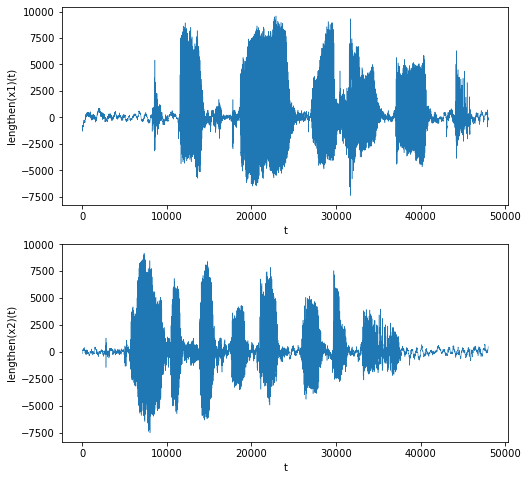

In [49]:
m = 2*n - 1
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(m), lengthen(x1), linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('lengthen(x1)(t)')
axs[1].plot(range(m), lengthen(x2), linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('lengthen(x2)(t)')
plt.show()

### Testing linearity

The function `lengthen` is linear (again, please verify this yourself), so the following vector-equality tests should all return true.

In [50]:
np.array_equal(lengthen(x1) + lengthen(x2), lengthen(x1 + x2)) # lengthen is additive!

True

In [51]:
np.array_equal(lengthen(2.0 * x1), 2.0 * lengthen(x1)) # lengthen is homogeneous!

True

In [52]:
np.array_equal(0.8 * lengthen(x1) + 0.2 * lengthen(x2), lengthen(0.8 * x1 + 0.2 * x2)) # lengthen is linear?

False

Oops, maybe the last test fails. Does that mean `lengthen` is not linear? Fortunately, this can be chalked up to round-off error from the use of floating point numbers. Let us use [`allclose`](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html#numpy-allclose) instead of [`array_equal`](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html#numpy-array-equal). This checks if two arrays are *very close* to each other elementwise, within a certain *tolerance* value (typically smaller than round-off error).

In [53]:
np.allclose(0.8 * lengthen(x1) + 0.2 * lengthen(x2), lengthen(0.8 * x1 + 0.2 * x2)) # lengthen is linear!

True

## Problem 3: Reversing a signal

Implement a function `reverse` that, given an $n$-vector $\vec x = (x_1,\dotsc,x_n)$, returns an $n$-vector $\vec y = (y_1,\dotsc,y_n)$ such that, for all $i \in \{1,\dotsc,n\}$,
$$ y_i = x_{n-i+1} . $$
You may assume that the input `x` to `reverse` is a `numpy` array.

In [54]:
def reverse(x):
  """
  Implement the `reverse` function described above. Return the n-vector y.
  """
  return x[::-1]

In [55]:
grader.check("p3")

p3 results: All test cases passed!

In [56]:
IPython.display.Audio(data=reverse(x1), rate=r)

In [57]:
IPython.display.Audio(data=reverse(x2), rate=r)

(The audio might sound a bit creepy.)

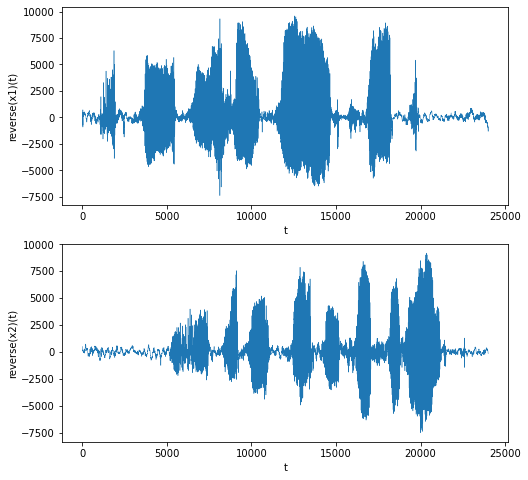

In [58]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(n), reverse(x1), linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('reverse(x1)(t)')
axs[1].plot(range(n), reverse(x2), linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('reverse(x2)(t)')
plt.show()

Please verify for yourself that `reverse` is linear.

In [59]:
np.array_equal(reverse(x1) + reverse(x2), reverse(x1 + x2)) # reverse is additive!

True

In [60]:
np.array_equal(reverse(2.0 * x1), 2.0 * reverse(x1)) # reverse is homogeneous!

True

In [61]:
np.allclose(0.8 * reverse(x1) + 0.2 * reverse(x2), reverse(0.8 * x1 + 0.2 * x2)) # reverse is linear!

True

## Problem 4: Composition

Write a function `super_creep` that is the composition of lengthening and reversing. That is, if $G$ is the (linear) transformation for lengthening, and $F$ is the (linear) transformation for reversing, `super_creep` should be $G \circ F$. You may again assume that the input `x` to `super_creep` is already a `numpy` array.



In [62]:
def super_creep(x):
  """
  Implement `super_creep,` the composition of lengthening and reversing. Returns a (2n-1)-vector y.
  """
  x=x[::-1]
  return lengthen(x)

In [63]:
grader.check("p4")

p4 results: All test cases passed!

In [64]:
IPython.display.Audio(data=super_creep(x1), rate=r)

In [65]:
IPython.display.Audio(data=super_creep(x2), rate=r)

(The audio will sound even creepier... avoid listening to this late at night.)

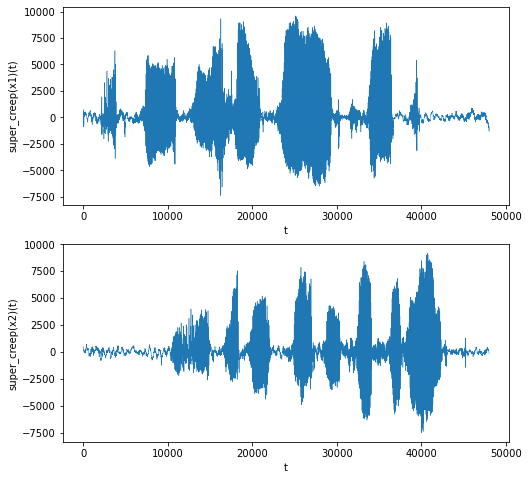

In [66]:
m = 2*n - 1
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(8)
axs[0].plot(range(m), super_creep(x1), linewidth=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('super_creep(x1)(t)')
axs[1].plot(range(m), super_creep(x2), linewidth=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('super_creep(x2)(t)')
plt.show()

Since `super_creep` is linear (as it is the composition of linear transformations), the following test should return true.

In [67]:
np.allclose(0.8 * super_creep(x1) + 0.2 * super_creep(x2), super_creep(0.8 * x1 + 0.2 * x2)) # super_creep is linear!

True

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [68]:
grader.check_all()

p1 results: All test cases passed!

p2 results: All test cases passed!

p3 results: All test cases passed!

p4 results: All test cases passed!